In [159]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [168]:
path_to_data = './ts_Amon_CESM2_piControl_r1i1p1f1_gn_110001-120012.nc'
TS_data = nc.Dataset(path_to_data)['ts']
lon = nc.Dataset(path_to_data)['lon']
lat = nc.Dataset(path_to_data)['lat']

path_to_areacella = './areacella_fx_CESM2_piControl_r1i1p1f1_gn.nc'
areacella = nc.Dataset(path_to_areacella)['areacella']

path_to_landmask = './sftlf_fx_CESM2_piControl_r1i1p1f1_gn.nc'
landmask = nc.Dataset(path_to_landmask)['sftlf'][:]

/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/2111778347.py:10: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  landmask = nc.Dataset(path_to_landmask)['sftlf'][:]
/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/2111778347.py:10: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  landmask = nc.Dataset(path_to_landmask)['sftlf'][:]


### Making a timeseries

In [169]:
print(np.shape(TS_data)), print(np.shape(lon)), print(np.shape(lat));

(1212, 192, 288)
(288,)
(192,)


The shape of TS is (time, lat, lon).

#### Make a timeseries of the surface temperature at 10N, 30 E

In [170]:
ind_lon = np.where(lon[:] >= 30)[0][0] # find where lon is about 30
print(ind_lon)

24


/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/4254950825.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ind_lon = np.where(lon[:] >= 30)[0][0] # find where lon is about 30


In [171]:
ind_lat = np.where(lat[:] >= 10)[0][0] # find where lon is about 30
print(ind_lat)

107


/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/1138074984.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ind_lat = np.where(lat[:] >= 10)[0][0] # find where lon is about 30


In [166]:
## define time axis
time = np.linspace(0, len(TS_data)/12, len(TS_data))

/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/291866005.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(time,TS_data[:, ind_lat, ind_lon])
/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/291866005.py:2: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  plt.plot(time,TS_data[:, ind_lat, ind_lon])


(0.0, 20.0)

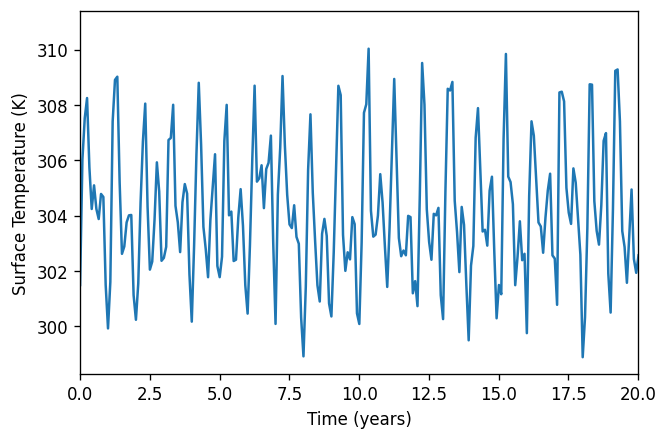

In [167]:
plt.figure(dpi=120)
plt.plot(time,TS_data[:, ind_lat, ind_lon])
plt.ylabel('Surface Temperature (K)')
plt.xlabel('Time (years)')
plt.xlim(0,20)

### Spatial Averaging

#### Plot GMST vs. time

In [172]:
GMST = np.sum(np.sum(TS_data[:]*areacella[:], axis = -1), axis=-1)/np.sum(areacella)

/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/1663578103.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  GMST = np.sum(np.sum(TS_data[:]*areacella[:], axis = -1), axis=-1)/np.sum(areacella)
/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/1663578103.py:1: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  GMST = np.sum(np.sum(TS_data[:]*areacella[:], axis = -1), axis=-1)/np.sum(areacella)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  return ufunc.reduce(ob

/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/4129412466.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.plot(time, np.mean(np.mean(TS_data[:], axis=-1),axis=-1), label = 'Mean')
/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/4129412466.py:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  plt.plot(time, np.mean(np.mean(TS_data[:], axis=-1),axis=-1), label = 'Mean')


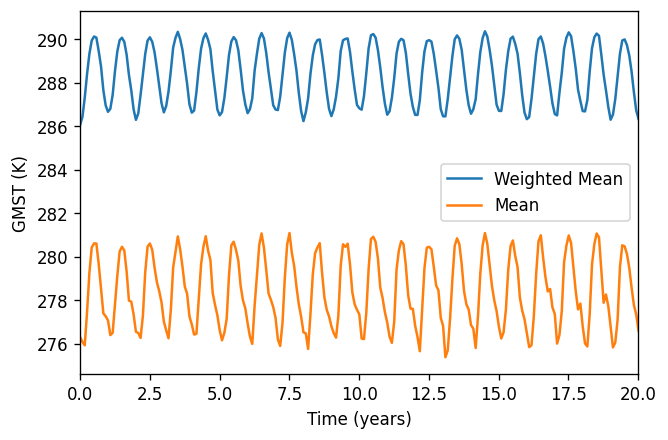

In [173]:
plt.figure(dpi=120)
plt.plot(time,GMST, label = 'Weighted Mean')
plt.plot(time, np.mean(np.mean(TS_data[:], axis=-1),axis=-1), label = 'Mean')
plt.ylabel('GMST (K)')
plt.xlabel('Time (years)')
plt.xlim(0,20)
plt.legend()

#### Why is there a seasonal cycle in GMST?

### Calculating Composites

Composites are useful when analyzing specific events, say El Nino.

In this example, we will make composites of Northern Hemisphere winter (DJF) and calculate the composite mean.

In [98]:
DJF_TS_data = [np.mean(TS_data[i*12-1:i*12+3],axis=0) for i in range(1,int(len(TS_data)/12))]
JJA_TS_data = [np.mean(TS_data[i*12+5:i*12+8],axis=0) for i in range(1,int(len(TS_data)/12))]

/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/1348186074.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  DJF_TS_data = [np.mean(TS_data[i*12-1:i*12+3],axis=0) for i in range(1,int(len(TS_data)/12))]
/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/1348186074.py:1: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  DJF_TS_data = [np.mean(TS_data[i*12-1:i*12+3],axis=0) for i in range(1,int(len(TS_data)/12))]
/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/1348186074.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this war

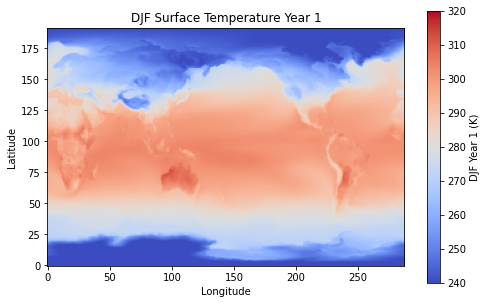

In [103]:
plt.figure(figsize=(8, 5))
plt.imshow(DJF_TS_data[0], vmin=240,vmax=320,cmap="coolwarm", origin="lower")
plt.colorbar(label="DJF Year 1 (K)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("DJF Surface Temperature Year 1")
plt.show()

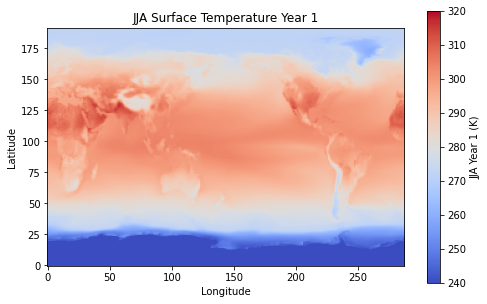

In [104]:
plt.figure(figsize=(8, 5))
plt.imshow(JJA_TS_data[0], vmin=240,vmax=320,cmap="coolwarm", origin="lower")
plt.colorbar(label="JJA Year 1 (K)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("JJA Surface Temperature Year 1")
plt.show()

Text(0.5, 1.0, 'DJF - JJA Composite Mean (K)')

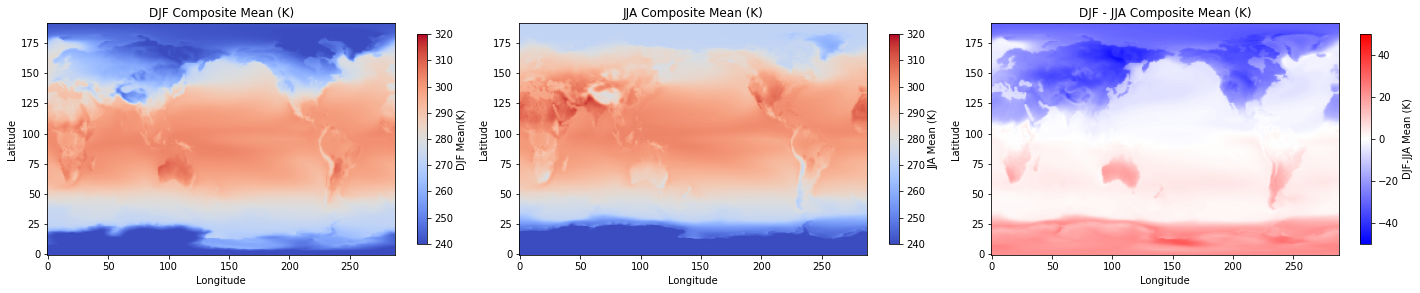

In [124]:
## composite means
comp_mean_DJF_TS = np.mean(DJF_TS_data, axis=0)
comp_mean_JJA_TS = np.mean(JJA_TS_data, axis=0)

fig, ax = plt.subplots(1,3,figsize=(20,10), tight_layout=True)

c= ax[0].imshow(comp_mean_DJF_TS, vmin=240,vmax=320,cmap="coolwarm", origin="lower")
plt.colorbar(c, label="DJF Mean(K)", ax=ax[0], shrink=0.3)
ax[0].set_xlabel("Longitude")
ax[0].set_ylabel("Latitude")
ax[0].set_title('DJF Composite Mean (K)')

c= ax[1].imshow(comp_mean_JJA_TS, vmin=240,vmax=320,cmap="coolwarm", origin="lower")
plt.colorbar(c, label="JJA Mean (K)", ax=ax[1],shrink=0.3)
ax[1].set_xlabel("Longitude")
ax[1].set_ylabel("Latitude")
ax[1].set_title('JJA Composite Mean (K)')

c= ax[2].imshow(comp_mean_DJF_TS-comp_mean_JJA_TS, vmin=-50,vmax=50,cmap="bwr", origin="lower")
plt.colorbar(c, label="DJF-JJA Mean (K)", ax=ax[2],shrink=0.3)
ax[2].set_xlabel("Longitude")
ax[2].set_ylabel("Latitude")
ax[2].set_title('DJF - JJA Composite Mean (K)')

### Performing PCA

PCA requires making a covariance matrix, which is often slow for big datasets. Instead we will do SVD (Singular Value Decomposition).

#### Step one: remove the local time mean from the data and only take SST (where landmask=0)

In [174]:
oceanmask = landmask*0
oceanmask[landmask==0] = 1

In [175]:
## calculate time mean at each lat-lon point

TS_mean = np.mean(TS_data[:]*oceanmask, axis=0) # take mean over time axis 

/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/546942698.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  TS_mean = np.mean(TS_data[:]*oceanmask, axis=0) # take mean over time axis
/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/546942698.py:3: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  TS_mean = np.mean(TS_data[:]*oceanmask, axis=0) # take mean over time axis


In [176]:
TS_anom = TS_data[:]*oceanmask-TS_mean # this is now the anomaly from the mean

/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/1204597202.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  TS_anom = TS_data[:]*oceanmask-TS_mean # this is now the anomaly from the mean
/var/folders/6q/ky9jkn4s6x5d2s_yvl865vpr0000gn/T/ipykernel_92110/1204597202.py:1: UserWarning: WARNING: missing_value not used since it
cannot be safely cast to variable data type
  TS_anom = TS_data[:]*oceanmask-TS_mean # this is now the anomaly from the mean


In [177]:
TS_anom_2d = np.reshape(TS_anom,(1212,192*288)) 

In [178]:
U, S, Vt = np.linalg.svd(TS_anom_2d, full_matrices=False)

In [179]:
print(np.shape(U), np.shape(S), np.shape(Vt))

(1212, 1212) (1212,) (1212, 55296)


In [180]:
eigenvalues = S**2  # Convert singular values to eigenvalues
eigenvectors = Vt.T  # Principal components

(0.0001, 2)

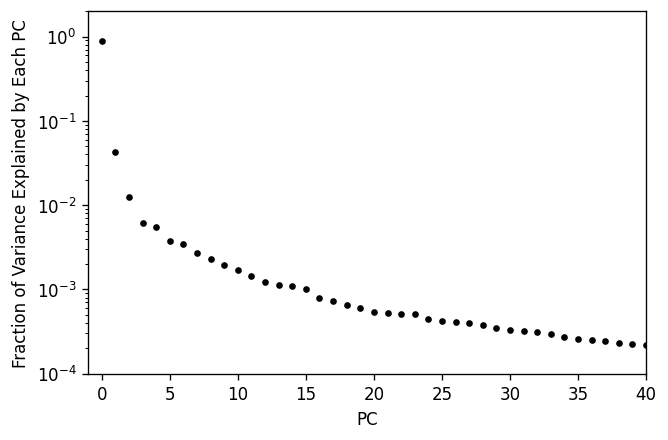

In [181]:
plt.figure(dpi=120)
plt.plot(eigenvalues/sum(eigenvalues),'k.')
plt.ylabel('Fraction of Variance Explained by Each PC')
plt.xlabel('PC')

plt.xlim(-1,40)
plt.yscale('log')
plt.ylim(1e-4,2)

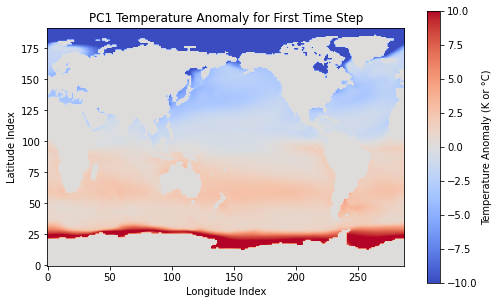

In [182]:
# Extract PC1 time series (scaled)
pc1_time_series = U[:, 0] * S[0]  # PC1 time series 

# Get PC1 spatial pattern 
pc1_spatial_pattern = eigenvectors[:,0].reshape(len(lat),len(lon))  # put back in lat-lon shape

# Scale PC1 anomalies back to temperature-like values (time, lat, lon)
pc1_anomalies = pc1_time_series[:, np.newaxis, np.newaxis] * pc1_spatial_pattern

# Visualize an example frame 
plt.figure(figsize=(8, 5))
plt.imshow(pc1_anomalies[0], vmin=-10,vmax=10,cmap="coolwarm", origin="lower")
plt.colorbar(label="Temperature Anomaly (K or °C)")
plt.xlabel("Longitude Index")
plt.ylabel("Latitude Index")
plt.title("PC1 Temperature Anomaly for First Time Step")
plt.show()


(0.0, 5.0)

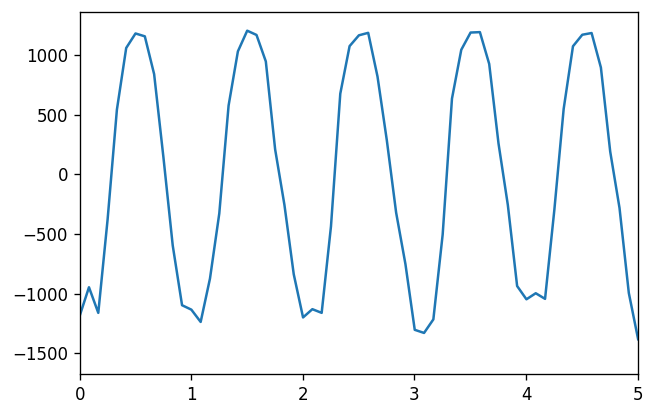

In [183]:
time = np.linspace(0, len(pc1_time_series)/12, len(pc1_time_series))
plt.figure(dpi=120)
plt.plot(time,pc1_time_series)
plt.xlim(0,5)

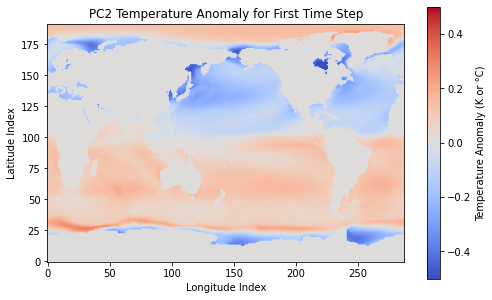

In [184]:

pc2_time_series = U[:, 1] * S[1]  

pc2_spatial_pattern = eigenvectors[:,1].reshape(len(lat),len(lon))  


pc2_anomalies = pc2_time_series[:, np.newaxis, np.newaxis] * pc2_spatial_pattern


plt.figure(figsize=(8, 5))
plt.imshow(pc2_anomalies[0], vmin=-0.5, vmax=0.5,cmap="coolwarm", origin="lower")
plt.colorbar(label="Temperature Anomaly (K or °C)")
plt.xlabel("Longitude Index")
plt.ylabel("Latitude Index")
plt.title("PC2 Temperature Anomaly for First Time Step")
plt.show()


(0.0, 10.0)

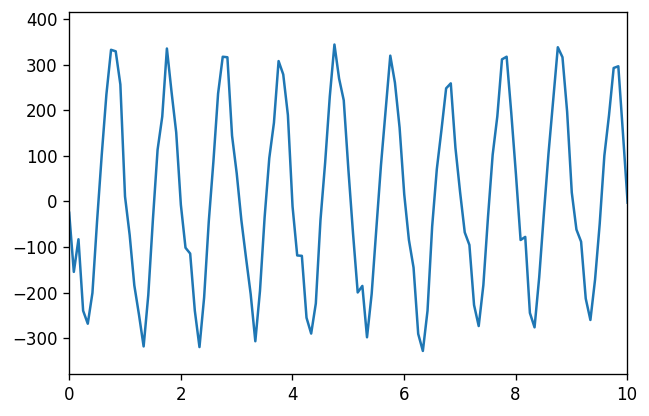

In [185]:
plt.figure(dpi=120)
plt.plot(time,pc2_time_series)
plt.xlim(0,10)

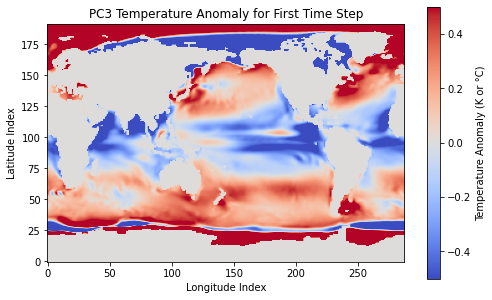

In [186]:

pc3_time_series = U[:, 2] * S[2] 


pc3_spatial_pattern = eigenvectors[:,2].reshape(len(lat),len(lon)) 


pc3_anomalies = pc3_time_series[:, np.newaxis, np.newaxis] * pc3_spatial_pattern

plt.figure(figsize=(8, 5))
plt.imshow(pc3_anomalies[0], vmin=-0.5,vmax=0.5,cmap="coolwarm", origin="lower")
plt.colorbar(label="Temperature Anomaly (K or °C)")
plt.xlabel("Longitude Index")
plt.ylabel("Latitude Index")
plt.title("PC3 Temperature Anomaly for First Time Step")
plt.show()


(0.0, 10.0)

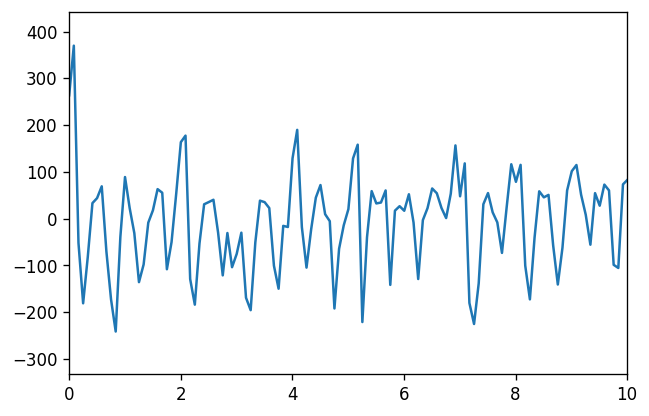

In [147]:
plt.figure(dpi=120)
plt.plot(time,pc3_time_series)
plt.xlim(0,10)

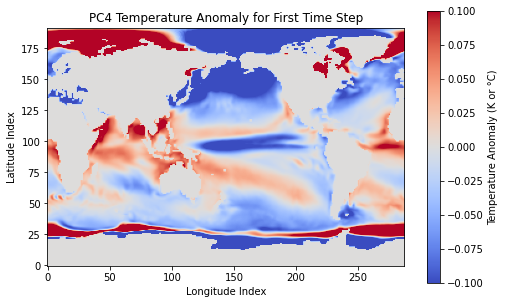

In [149]:

pc4_time_series = U[:, 3] * S[3] 


pc4_spatial_pattern = eigenvectors[:,3].reshape(len(lat),len(lon)) 


pc4_anomalies = pc4_time_series[:, np.newaxis, np.newaxis] * pc4_spatial_pattern

plt.figure(figsize=(8, 5))
plt.imshow(pc4_anomalies[0], vmin=-0.1,vmax=0.1,cmap="coolwarm", origin="lower")
plt.colorbar(label="Temperature Anomaly (K or °C)")
plt.xlabel("Longitude Index")
plt.ylabel("Latitude Index")
plt.title("PC4 Temperature Anomaly for First Time Step")
plt.show()
